In [1]:
import snapatac2 as snap
import numpy as np
import polars as pl

snap.__version__

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


'2.5.3'

In [4]:
adata = snap.read("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/2024_01_20/condition_within_batch/ext4/snapatac2/peak_matrices/peak_mat.h5ad", backed=None)
adata

AnnData object with n_obs × n_vars = 33633 × 520861
    obs: 'sample', 'integrated_manual_cellid_annotation', 'leiden_1'

In [10]:
marker_peaks = snap.tl.marker_regions(adata, groupby='integrated_manual_cellid_annotation', pvalue=0.025)

In [22]:
# Write marker peaks to bed file
with open("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/2024_01_20/condition_within_batch/ext4/snapatac2/SC.beta_marker_peaks.bed", "w") as f:
    for peak in marker_peaks["SC.beta"]:
        chrom = peak.split(":")[0]
        start = int(peak.split(":")[1].split("-")[0])
        end = int(peak.split(":")[1].split("-")[1])
        f.write(f"{chrom}\t{start}\t{end}\n")

2024-01-21 12:51:01 - WARNING - Input contains 78268 peaks, only 50000 peaks will be plotted.


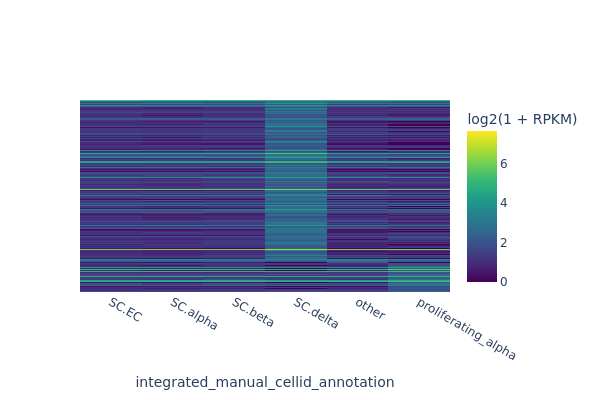

In [12]:
snap.pl.regions(adata, groupby='integrated_manual_cellid_annotation', peaks=marker_peaks, interactive=False)

In [22]:
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=marker_peaks,
    genome_fasta=snap.genome.hg38,
)

2024-01-16 15:07:03 - INFO - Fetching 33542 sequences ...
2024-01-16 15:08:09 - INFO - Computing enrichment ...
100%|██████████| 1165/1165 [29:36<00:00,  1.53s/it]


In [23]:
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=marker_peaks,
    genome_fasta=snap.genome.hg38,
)

2024-01-16 16:11:33 - INFO - Fetching 33542 sequences ...
2024-01-16 16:11:57 - INFO - Computing enrichment ...
100%|██████████| 1165/1165 [30:38<00:00,  1.58s/it]


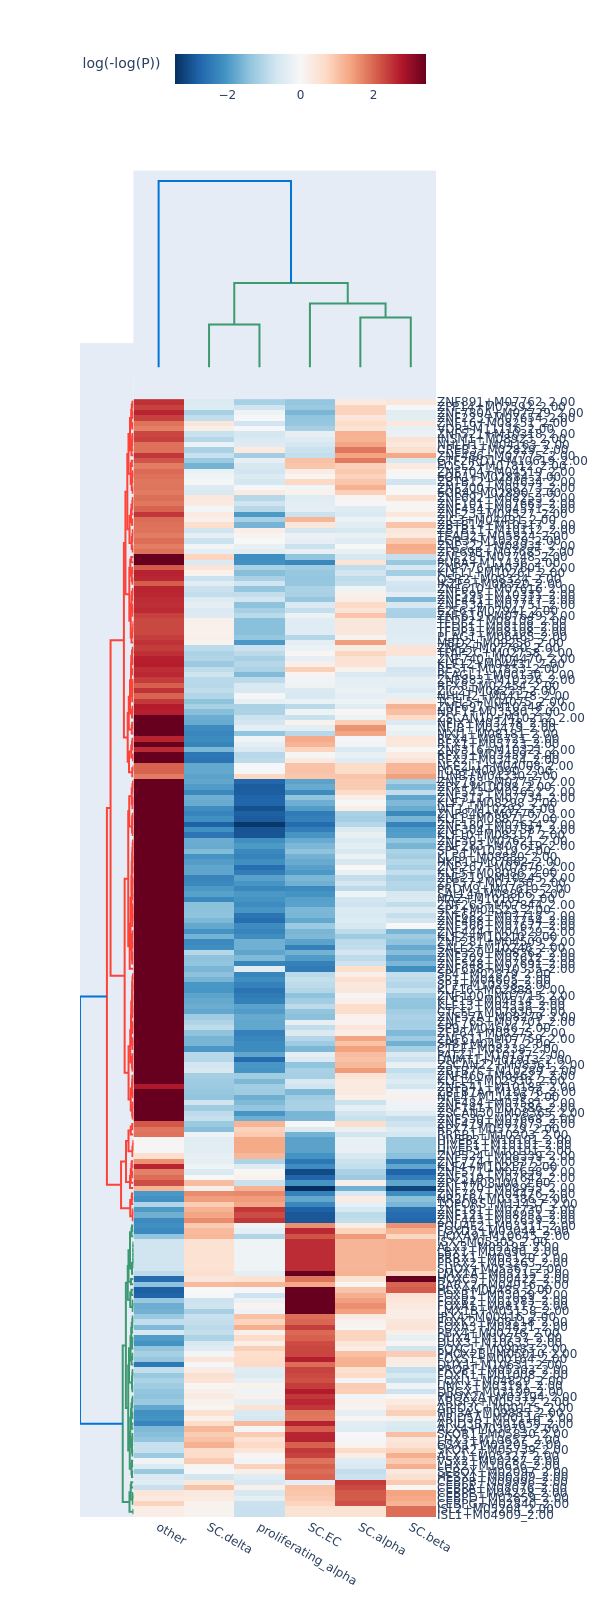

In [26]:
snap.pl.motif_enrichment(motifs, max_fdr=0.00001, height=1600, interactive=False)

In [47]:
df = motifs["other"].to_pandas()

In [48]:
df.sort_values("adjusted p-value").head(25)

,id,name,family,log2(fold change),p-value,adjusted p-value
1084,ZNF682+M07718_2.00,ZNF682,NaN,0.952491,0.0,0.0
856,ZFP64+M08275_2.00,ZFP64,NaN,1.063621,0.0,0.0
82,CTCFL+M07930_2.00,CTCFL,NaN,0.989257,0.0,0.0
81,CTCF+M08238_2.00,CTCF,NaN,0.989437,0.0,0.0
855,ZFP57+M07756_2.00,ZFP57,NaN,0.785778,0.0,0.0
1028,ZNF548+M07691_2.00,ZNF548,NaN,0.814601,0.0,0.0
1026,ZNF543+M07652_2.00,ZNF543,NaN,1.117337,0.0,0.0
843,ZBTB7C+M10289_2.00,ZBTB7C,NaN,0.988502,0.0,0.0
841,ZBTB7A+M10276_2.00,ZBTB7A,NaN,1.013781,0.0,0.0
824,ZBTB17+M08878_2.00,ZBTB17,NaN,0.551204,0.0,0.0


In [40]:
df[df["name"].str.contains("HNF")]

,id,name,family,log2(fold change),p-value,adjusted p-value
295,HNF1A+M03150_2.00,HNF1A,NaN,0.835850,0.022085,0.199740
296,HNF1B+M03246_2.00,HNF1B,NaN,0.888911,0.020820,0.199740
297,HNF4A+M03360_2.00,HNF4A,NaN,0.078985,0.316663,0.481424
298,HNF4G+M09287_2.00,HNF4G,NaN,0.357118,0.190931,0.417299
